<a href="https://colab.research.google.com/github/sararst/MLDL_2023/blob/main/Lab/Lab2/Ex4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.mixture import GaussianMixture as GMM

import seaborn as sns
sns.set(style="darkgrid")


In [30]:
# plot some examples
def plot_digits(X, y): 
  rows = 3
  columns = 5
  fig = plt.figure(figsize=(15, 7))
  for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)

    reshaped_arr = X[i-1].reshape(8, 8)
    plt.imshow(reshaped_arr, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    # plt.title(f"digit: {y[i-1]}")

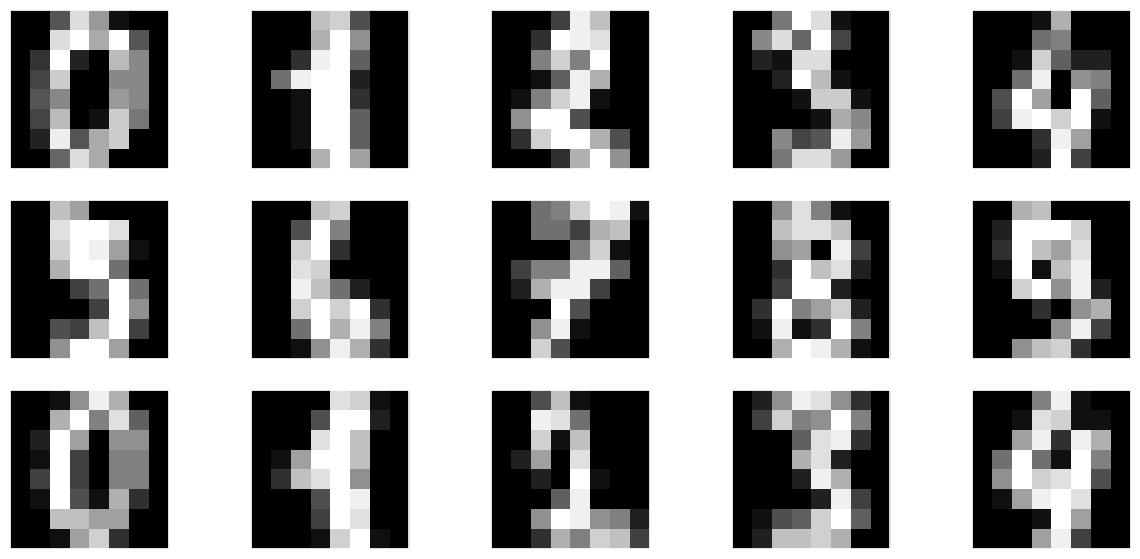

In [31]:
X, y = load_digits(return_X_y=True)
plot_digits(X, y)

GMMs might have troubles converging in high dimensional spaces. Apply PCA and preserve 99% of 
the variance

In [11]:
pca = PCA(0.99)

In [13]:
X_pca = pca.fit_transform(X)
pca.n_components_  # you need 41 components

41

Define and fit your GMM model:
a. Use BIC to select the best number of components to fit the reduced data. Try a few values in the 
range [10, 250].
b. Fit the GMM model with the best number of components to the reduced data. Check its convergence 
with gmm.converged_

In [15]:
def gmm_bic_score(estimator, X):
    return -estimator.bic(X)

In [17]:
n_cv = 5
param_grid = {'n_components': [i for i in range(10, 250, 7)], 'random_state': [42]}
grid_search = GridSearchCV(GMM(), param_grid=param_grid, scoring=gmm_bic_score, cv=n_cv)

In [18]:
grid_search.fit(X_pca)

GridSearchCV(cv=5, estimator=GaussianMixture(),
             param_grid={'n_components': [10, 17, 24, 31, 38, 45, 52, 59, 66,
                                          73, 80, 87, 94, 101, 108, 115, 122,
                                          129, 136, 143, 150, 157, 164, 171,
                                          178, 185, 192, 199, 206, 213, ...],
                         'random_state': [42]},
             scoring=<function gmm_bic_score at 0x7f4b4b99b4c0>)

In [20]:
best_gmm = grid_search.best_estimator_
best_gmm

GaussianMixture(n_components=10, random_state=42)

In [29]:
X_sample, y_sample = best_gmm.sample(15)
X_sample.shape

(15, 41)

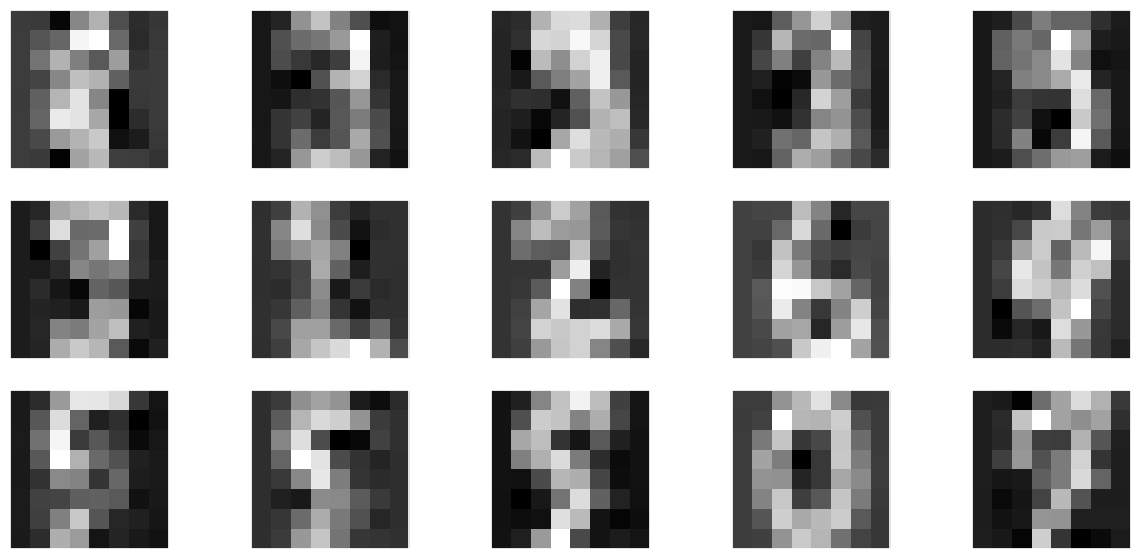

In [32]:
X_original = pca.inverse_transform(X_sample)
plot_digits(X_original, y_sample)